
## Linear regression
In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar datos desde un archivo de texto, separados por comas
data = np.loadtxt('ex1data1.txt', delimiter=',')

# Mostrar las primeras 5 filas para inspección
print(data[0:5,:])

# Extraer columna 0 como X (población), columna 1 como y (ganancia)
X = data[:, 0]
y = data[:, 1]

[[ 6.1101 17.592 ]
 [ 5.5277  9.1302]
 [ 8.5186 13.662 ]
 [ 7.0032 11.854 ]
 [ 5.8598  6.8233]]


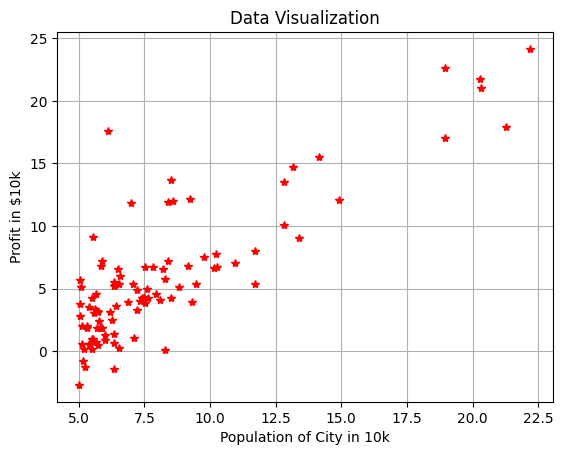

In [2]:
# ==================== Parte 1: Gráfica de los datos ====================

# Crear gráfico de dispersión: puntos rojos en forma de estrella
plt.plot(X, y, '*r', label='Profit')

# Activar la cuadrícula
plt.grid(True)

# Etiquetas de los ejes y título
plt.xlabel('Population of City in 10k')# Label for x-axis
plt.ylabel('Profit in $10k')# Label for y-axis
plt.title('Data Visualization')# Add a title

# Mostrar gráfico
plt.show()

## Cost Function
The objective of linear regression is to minimize the cost function:

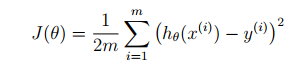

where the hypothesis h is given by

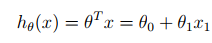

Create a matrix by adding a column of ones to the vecto X

You should expect to see a cost of approximately 32.07

In [3]:
from scipy.optimize import minimize

# Definir función de costo para regresión lineal
def cost_function(theta, X, y):
    m = len(y)  # número de ejemplos
    predictions = X @ theta  # h(x) = X * theta
    errors = predictions - y  # diferencia entre predicción y realidad
    J = (1 / (2 * m)) * np.dot(errors.T, errors)  # fórmula del costo
    return J

# Preparar variables
m = data.shape[0]           # número de ejemplos
y = data[:, 1]              # columna de ganancias
X = data[:, 0]              # columna de población

# Agregar una columna de unos a X para el término theta_0
X = np.stack([np.ones(m), X], axis=1)  # X ahora es una matriz m x 2

# Inicializar theta como vector columna de ceros (2x1)
theta = np.zeros((2, 1))

# Convertir y a vector columna si no lo es
y = y.reshape(-1, 1)

# Mostrar parámetros iniciales y valor del costo
print(f"Model parameters: {theta}")
print(f"Cost function: {cost_function(theta, X, y)}")  # Debería dar ~32.07


Model parameters: [[0.]
 [0.]]
Cost function: [[32.07273388]]


## Gradient descent
Next, you will implement gradient descent in the file gradientDescent.m. The loop structure has been written for you, and you only need to supply the updates to θ within each iteration.

Using the following values: iterations = 3 theta = np.zeros((2, 1)) alpha = 0.01

The first three iteration:

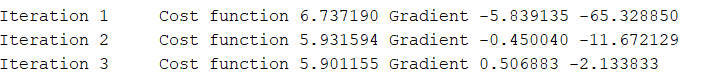

In [4]:
# Parámetros para el algoritmo
iterations = 3  # número de iteraciones
alpha = 0.01    # tasa de aprendizaje

# Reasignar X, y, theta para asegurar forma correcta
m = data.shape[0]
y = data[:, [1]]
X = data[:, [0]]
X = np.hstack([np.ones((m, 1)), X])  # añadir columna de unos
theta = np.zeros((2, 1))            # inicializar theta

# Redefinir función de costo con .item() para retornar escalar
def cost_function(theta, X, y):
    m = len(y)
    predictions = X @ theta
    errors = predictions - y
    J = (1 / (2 * m)) * np.dot(errors.T, errors)
    return J.item()  # retorna escalar

# Función para aplicar descenso por gradiente
def gradientDescent(X, y, theta, alpha, iterations):
    m = len(y)
    J_history = np.zeros(iterations)  # historial de costos

    for iter in range(iterations):
        predictions = X @ theta
        errors = predictions - y
        gradient = (1 / m) * (X.T @ errors)  # gradiente de J
        theta = theta - alpha * gradient     # actualizar theta

        J_history[iter] = cost_function(theta, X, y)
        print(f"Iteration {iter + 1}\tCost: {J_history[iter]:.6f}\tGradient: {gradient.ravel()[0]:.3f} {gradient.ravel()[1]:.3f}")

    return theta, J_history

# Ejecutar descenso por gradiente
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)

# Mostrar parámetros encontrados
print("Theta found by gradient descent: ", theta.ravel())


Iteration 1	Cost: 6.737190	Gradient: -5.839 -65.329
Iteration 2	Cost: 5.931594	Gradient: -0.450 -11.672
Iteration 3	Cost: 5.901155	Gradient: 0.507 -2.134
Theta found by gradient descent:  [0.05782293 0.79134812]


For population = 35,000, we predict a profit of $28275.41
For population = 70,000, we predict a profit of $55972.60


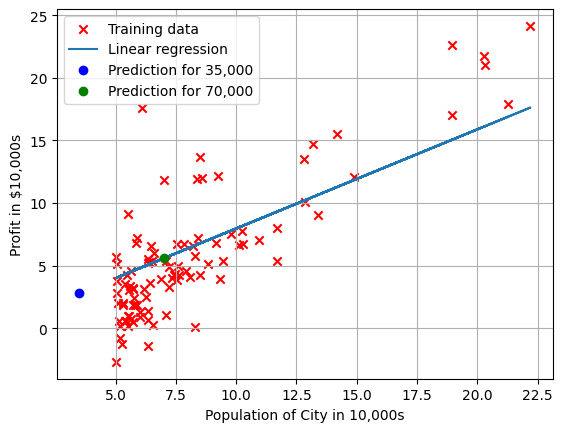

In [5]:
# Hacer predicciones para valores dados
predict1 = np.array([1, 3.5]) @ theta  # población = 35,000
print(f'For population = 35,000, we predict a profit of ${(predict1.item() * 10000):.2f}')

predict2 = np.array([1, 7.0]) @ theta  # población = 70,000
print(f'For population = 70,000, we predict a profit of ${(predict2.item() * 10000):.2f}')

# Graficar datos y regresión lineal
plt.scatter(X[:, 1], y, color='red', marker='x', label='Training data')  # datos
plt.plot(X[:, 1], X @ theta, label='Linear regression')  # línea ajustada
plt.plot(3.5, predict1.item(), 'ob', label='Prediction for 35,000')  # predicción 1
plt.plot(7.0, predict2.item(), 'og', label='Prediction for 70,000')  # predicción 2

# Etiquetas
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend()
plt.grid(True)
plt.show()


Visualization

Visualizing J(theta_0, theta_1) ...


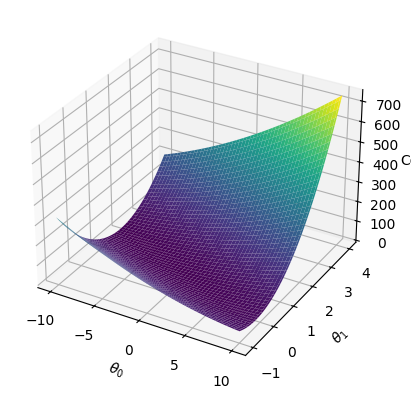

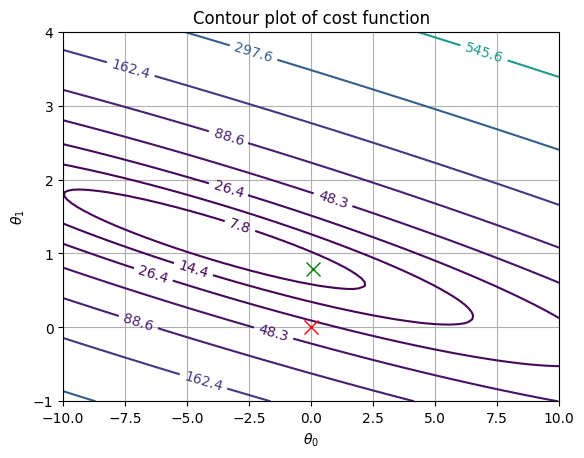

In [6]:
from mpl_toolkits.mplot3d import Axes3D  # Importación para gráfico 3D

print('Visualizing J(theta_0, theta_1) ...')

theta_init = np.zeros((2, 1))  # theta inicial

# Crear una malla de valores para theta0 y theta1
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# Inicializar matriz para almacenar los valores de costo
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Calcular J para cada combinación de theta0 y theta1
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([[theta0_vals[i]], [theta1_vals[j]]])
        J_vals[i, j] = cost_function(t, X, y)

# Transponer J_vals 
J_vals = J_vals.T

# Crear gráfico de superficie 3D
theta0_vals_mesh, theta1_vals_mesh = np.meshgrid(theta0_vals, theta1_vals)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta0_vals_mesh, theta1_vals_mesh, J_vals, cmap='viridis')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel('Cost')

# Crear gráfico de contorno
plt.figure()
cp = plt.contour(theta0_vals, theta1_vals, J_vals, levels=np.logspace(-2, 3, 20))
plt.clabel(cp)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')

# Marcar puntos en el gráfico de contorno
plt.plot(theta_init[0, 0], theta_init[1, 0], 'rx', markersize=10, linewidth=2)  # theta inicial
plt.plot(theta[0, 0], theta[1, 0], 'gx', markersize=10, linewidth=2)  # theta final

plt.title('Contour plot of cost function')
plt.grid(True)
plt.show()
